# Pandas 

## By: Molly Davis 

## Email: mdavi258@uncc.edu

-------

The following CSV files in Part A & B consist of confirmed COVID cases and COVID deaths from 2020 to 2021 in the United States. Multiple questions are asked and answered with the use of PANDAS. The plots compare different states or counties to eachother over a certain amount of time.

## Part A 

Section 1: 

In [1]:
import pandas as pd  
COVID = pd.read_csv("/Users/mollydavis333/desktop/time_series_covid19_confirmed_US.csv", index_col = "UID")
COVID #Prints the original dataframe

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,6517,6525,6533,6540,6543,6562,6570,6577,6580,6589
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,20361,20354,20395,20417,20423,20453,20473,20487,20492,20505
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,2213,2213,2216,2218,2221,2224,2226,2226,2227,2227
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,2529,2530,2535,2534,2535,2535,2536,2536,2537,2542
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,6387,6388,6402,6408,6415,6420,6424,6426,6443,6444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",...,3530,3532,3547,3549,3562,3562,3562,3593,3593,3609
84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",...,2109,2111,2113,2115,2119,2119,2119,2123,2125,2128
84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",...,0,0,0,0,0,0,0,0,0,0


In [2]:
COVID_states = COVID.groupby('Province_State').sum() #Combines all the counties from each state to just have state data.

-----------

Question A. 

Which state/territory had the highest numerical increase in confirmed cases over the summer months (June 1st through August 31th)?

In [3]:
summer_COVID = COVID_states.loc[:, '6/1/20':'8/31/20'] #With the state data, the time frame was parsed. The time was the summer of 2020, which is when cases started rising quickly at the beginning of the pandemic.  

<AxesSubplot:title={'center':'Top 5 Summer COVID Numerical Increase'}>

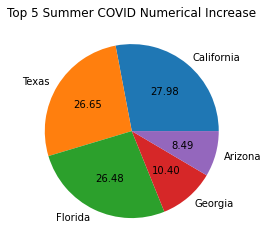

In [4]:
summer_difference = summer_COVID['8/31/20'] - summer_COVID['6/1/20'] #Takes the final cases from the original case number for each state to get the difference. 
summer_difference 
sort = summer_difference.sort_values(ascending=False) #Sorts the highest numerical increase and shows the States with the highest increase of COVID cases in that time period. 
sort[:5].plot.pie(title = "Top 5 Summer COVID Numerical Increase", ylabel = (""), autopct="%.2f") #Uses a Pie plot for the top 5 States from the sorted data. 

Pie Plot Discussion: The plot shows that California had the highest numerical increase over the Summer time period of 2020. Texas and Florida were not far behind having the same increase of confirmed cases.     

------

Question B. 

Which state/territory had the highest percentage increase in confirmed cases over the same time period?

<AxesSubplot:title={'center':'Top 5 Highest and Lowest Summer COVID Percentage Increase'}, xlabel='Province_State', ylabel='Percent'>

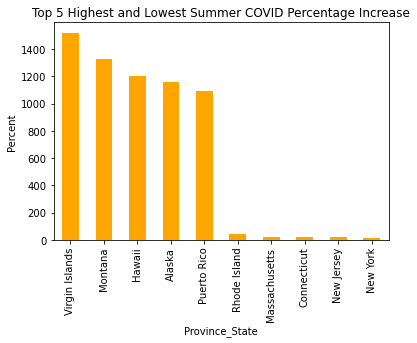

In [5]:
percent_state = summer_difference / summer_COVID['6/1/20'] * 100  #Calculates the percent increase of the states of the summer. 
percent_state
sort_percent = percent_state.sort_values(ascending= False) #Sorts the states with the highest percentage increase.
sort_percent.head(5).append(sort_percent[:-3].tail(5)).plot.bar(title = "Top 5 Highest and Lowest Summer COVID Percentage Increase", color = "orange", ylabel='Percent') #Uses a bar plot with the sorted data. Takes only the top 5 lowest and highest states. Removed the cruise chips for the bottom 5.   

Bar Plot Discussion: Shows that the Virgin Islands had the highest percentage increase of COVID cases over the summer of 2020. The percentage shows the intensity of gained cases compared to other states. The plot includes the top 5 highest and top 5 lowest states to capitalize the drastic change.    

-------

Question C. 

What was the percentage increase in Mecklenburg Co. over the same time period? 

<AxesSubplot:title={'center':'Summer COVID Percentage Increase in Mecklenburg Co.'}, ylabel='Percent'>

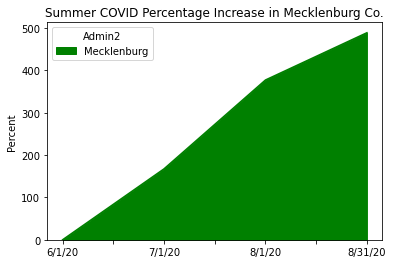

In [6]:
NC_index = COVID.set_index('Admin2') #Changes the Index so the county can be identified. Also the original database was used so counties could be used.  
NC_index
county = NC_index[NC_index.Combined_Key == "Mecklenburg, North Carolina, US"] #Finds the Combined_Key column so Mecklenburg can be parsed out.
county
county_diff = county[['6/1/20', '7/1/20', '8/1/20', '8/31/20']] - int(county['6/1/20']) #With the county data, the beginning of each summer date was found and each subtracted with the original number of cases to find the difference. int() was used so calculations could be made.   
county_diff 
county_percent = county_diff / int(county['6/1/20']) * 100 #Calculates the percent increase of the counties cases over summer months.
county_percent
county_percent.T.plot.area(title = "Summer COVID Percentage Increase in Mecklenburg Co.", color = 'green', ylabel= 'Percent') #Uses a area plot so Mecklenburgs summer percent increase could be seen.  

Area Plot Discussion: Shows the percentage increase of cases in Mecklenburg County over the summer months. From observation we can see that increased more drastically between July and August, which is when most families and college kids go on vacation or celebrate holidays like fourth of july.     

--------

Question D. 

Which County in NC had the highest percentage increase in confirmed cases over the same time period?

<AxesSubplot:title={'center':'Top 5 Highest and Lowest NC County COVID Percentage Increase'}, ylabel='Combined_Key'>

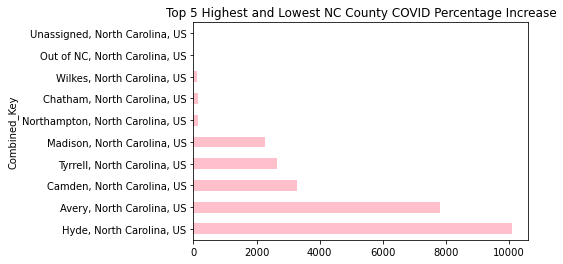

In [7]:
NC_index = COVID.set_index('Combined_Key') #Uses the original COVID database so counties can be used. Set the index to Combined_Key so County names will be seen when called on. 
NC_index
NC_county = NC_index[NC_index.Province_State == "North Carolina"] #Finds all of the counties in North Carolina. 
NC_county
NC_diff = NC_county['8/31/20'] - NC_county['6/1/20'] #Takes the numerical increase in cases for all NC counties between summer months. 
NC_diff
NC_percent = NC_diff / NC_county['6/1/20'] * 100 #Calc. the percent increase for all NC counties  
NC_percent
NC_sort = NC_percent.sort_values(ascending=False) #Sorts the counties with the highest percent increase.
NC_sort.head(5).append(NC_sort.tail(5)).plot.barh(title = "Top 5 Highest and Lowest NC County COVID Percentage Increase", color = 'pink') #Makes a horizontal bar plot which shows the top 5 highest and lowest county percent increase. 

Horizontal Bar Plot Discussion: Shows that Hyde county in North Carolina had the highest percentage increase in COVID cases over the summer months. Compared to other counties this is a huge percentage increase.   

------

Section 2:

Question A. 

What proportion of cases nationally had occurred in NY State at the start of each month, from March 2020 to August 2020? 

In [8]:
monthly_COVID = COVID_states[['3/1/20','4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20']] #Uses the States database made and parses out a specific day of each month chosen.   
monthly_COVID  
total = monthly_COVID[['3/1/20','4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20']].sum() #Takes the sum for all of the states for each date. 
calc_all = monthly_COVID[['3/1/20','4/1/20', '5/1/20', '6/1/20', '7/1/20', '8/1/20']] / total * 100 #Calcs. the percent proportion of each state compared to the sum of all states. 

<AxesSubplot:title={'center':'Proportion of NY cases to Top States'}, ylabel='Percent'>

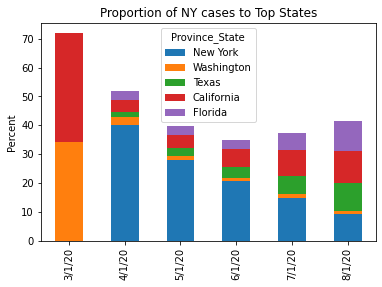

In [9]:
new_york_pro = calc_all.loc[['New York', 'Washington', 'Texas', 'California', 'Florida']] #Takes just the New York proportion and other states that were high in proportion to compare data.
new_york_pro.T.plot.bar(title = 'Proportion of NY cases to Top States', stacked = True, ylabel='Percent') #Makes a stacked bar plot of the selected states to compare the proportion for each date selected.   

Stacked Bar Plot Discussion: The figure depicts New York and how COVID cases skyrocket in April of 2020. But over time took control and got cases to drop again over time, while other states were consistantly an issue. 

array([<AxesSubplot:title={'center':'New York'}, ylabel='Percent'>,
       <AxesSubplot:title={'center':'Washington'}, ylabel='Percent'>,
       <AxesSubplot:title={'center':'Texas'}, ylabel='Percent'>,
       <AxesSubplot:title={'center':'California'}, ylabel='Percent'>,
       <AxesSubplot:title={'center':'Florida'}, ylabel='Percent'>],
      dtype=object)

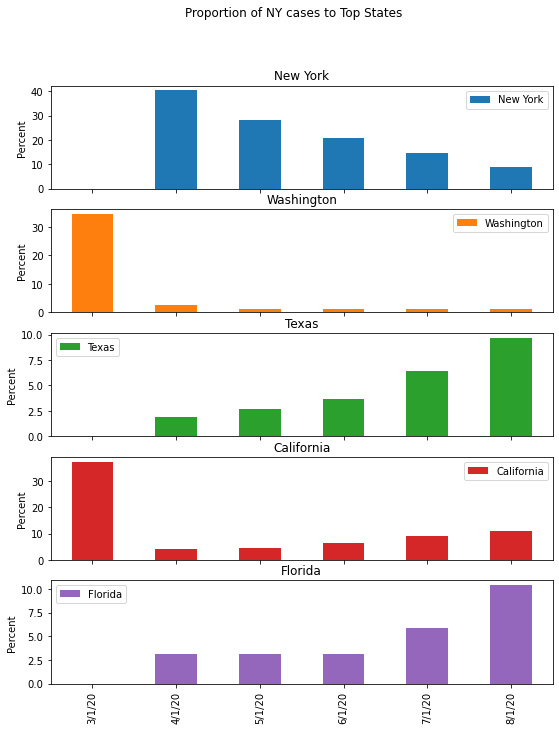

In [10]:
new_york_pro.T.plot.bar(title = 'Proportion of NY cases to Top States', subplots = True, figsize=(9, 11), ylabel='Percent')

Subplot Discussion: This plot is another way to view the case trend for New York compared to other states. New York made up almost 50% of cases in April 2020 and over time handled COVID better. While other states continued to struggle with COVID over multiple months.   

------

## Part B

The cases dataset used before will be used in part B as well. When looking at both dataframes we see that the US_deaths dataset extends to 4/26/21. So we must make the dataframe the same time length (3/31/21) to ensure accurate results.   

In [11]:
US_deaths = pd.read_csv("/Users/mollydavis333/desktop/US_deaths.csv", index_col = "UID") #CSV file of COVID deaths over a specific time.
US_deaths

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,106,106,106,106,107,107,107,107,107,107
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,302,302,302,302,302,303,303,305,305,305
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,55,55,55,55,55,56,56,56,56,56
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,61,61,61,61,61,62,62,62,62,62
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,133,133,133,133,133,133,134,134,134,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",...,9,9,9,9,9,9,9,9,9,9
84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",...,12,12,12,12,12,12,12,12,12,12
84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",...,0,0,0,0,0,0,0,0,0,0


------

Question 1. Which state proportionally had the most COVID deaths compared to COVID cases on the final date 3/31/21?           

<AxesSubplot:title={'center':'Percent of Deaths to Cases in US States'}, xlabel='Province_State', ylabel='Percent'>

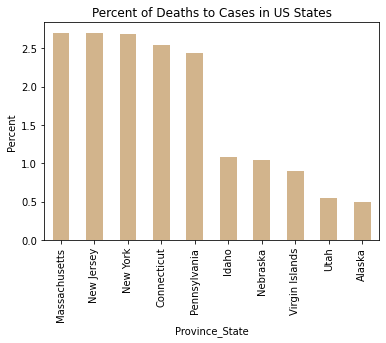

In [12]:
US_death_state = US_deaths.groupby('Province_State').sum() #Groups the states together so there's no more counties just states.
US_death_state
US_death_range_state = US_death_state['3/31/21'] #Finds the specific column date in death dataframe.  
US_death_range_state

US_cases_range_state = COVID_states['3/31/21'] #Finds the specific column date in cases dataframe.
US_cases_range_state

state_proportion =  US_death_range_state / US_cases_range_state * 100 #Calculates the percent of deaths from the amount of cases.

sort_state = state_proportion.sort_values(ascending=False) #Orders all of the percent proportions to find the highest numbers first. 
sort_state[1:6].head(5).append(sort_state[:-2].tail(5)).plot.bar(title = "Percent of Deaths to Cases in US States", ylabel="Percent", color= "tan") #Didn't include the first option because it was a cruise ship not a state. 

Bar Plot Discussion: It's important to acknowledge that the data was calculated just on the single final date and doesn't include other dates that might have had a larger percentage. For example, if we looked at a different time, the percent might be higher for a different state. But we use the final date in the data because we want the proportion for all time not just on one day that could have been bad.      

--------

Question 2. Within the highest state, which County has the highest proportion of deaths compared to cases on the final date 3/31/21?

<AxesSubplot:title={'center':' Top 5 Massachusetts Counties with High Death Rates'}>

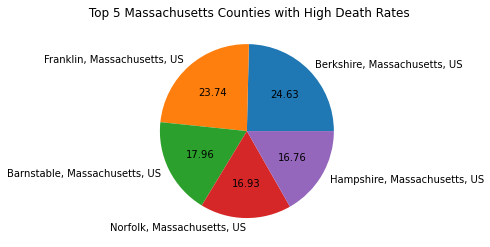

In [13]:
death_index = US_deaths.set_index('Combined_Key') #Changes the index in deaths dataframe so county names can be identified.
death_index
mass_county = death_index[death_index.Province_State == "Massachusetts"] #Chooses all of the Massachusetts counties.
mass_county
mass_county_range = mass_county['3/31/21'] #All the counties deaths on the specific date. 
mass_county_range

cases_index = COVID.set_index('Combined_Key') #Changes index for cases dataframe.  
cases_index
cases_county = cases_index[cases_index.Province_State == "Massachusetts"] #Chooses all of the Massachusetts counties in cases dataframe. 
cases_county
cases_county_range = cases_county['3/31/21'] #All the counties cases on the specific date.
cases_county_range

county_proportion = mass_county_range / cases_county_range * 100 #Calculates the counties death percent compared with cases. 
sort_county = county_proportion.sort_values(ascending=False) #Sorts the counties percents and gives the highest first. 
sort_county[0:5].plot.pie(title = " Top 5 Massachusetts Counties with High Death Rates" , ylabel = (""), autopct="%.2f") #Plots the data and just shows the top 5 counties.

Pie Plot Discussion: The plot shows the percent of which Massachusetts county had the highest percentage of COVID deaths to cases. The other counties are about the same as Berkshire county which indicates that all of Massachusetts was largely affected by COVID deaths. 

-------

Question 3. Within the highest County, at what time period were deaths compared to cases proportionally the highest? 

In [14]:
mass_index_deaths = US_deaths.set_index('Admin2') #Sets the index to all the counties in death dataframe.     
mass_county_deaths = mass_index_deaths[mass_index_deaths.Combined_Key == "Berkshire, Massachusetts, US"].loc[:, '1/22/20':'3/31/21'] #Finds Berkshire specifically in death dataframe and creates the time frame to use.  

mass_index_cases = COVID.set_index('Admin2')  
mass_county_cases = mass_index_cases[mass_index_cases.Combined_Key == "Berkshire, Massachusetts, US"].loc[:, '1/22/20':'3/31/21'] #Finds Berkshire specifically in cases dataframe and creates the time frame to use. 

<AxesSubplot:title={'center':'Berkshire, Massachusetts COVID Death Rates Compared to Cases'}, ylabel='Percent'>

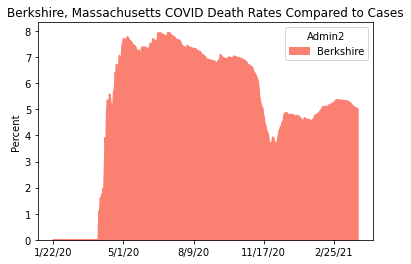

In [15]:
berk_time_proportion = mass_county_deaths / mass_county_cases * 100 #Calculates the percent of deaths to cases in the county over the time period. 
berk_time_proportion.T.plot.area(title = "Berkshire, Massachusetts COVID Death Rates Compared to Cases", color = "salmon", ylabel = "Percent") #Plots the Proportions and shows the largest changes over the time range. 

Area Plot Discussion: This data is somewhat alarming for the Berkshire community. We see that during the beginning of Summer 2020 COVID deaths were extremely high proportionally compared to COVID cases. By understanding the population and geography of the state it might shed light on the deaths that have been occuring. It was determined that 16.5% of the population is 65 and older. Geographically, the state is right next to New York, which saw a huge jump in cases in April 2020. Berkshire had .02 deaths per 1,000 people. The New York and Seattle metropolitan areas had .03 deaths per 1,000 people. So research confirms that the plot above is accurate and that Berkshire has a continuous issue of deaths and cases of COVID-19. 

https://commonwealthmagazine.org/health-care/berkshire-county-a-covid-19-hotspot/

https://www.prb.org/which-us-states-are-the-oldest/